## HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/MrKundann/Datasets/main/WA_Fn-UseC_-HR-Employee-Attrition.csv") 
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.shape 

(1470, 35)

In [5]:
pd.set_option('display.max_rows',None)
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

## Checking for duplicates

In [6]:
#from what i see in the dataset, lets check 'EmployeeCount', and, 'StandardHours' has same value for every record, so lets check for duplicates

print(df['EmployeeCount'].unique())
print(df['StandardHours'].unique())

[1]
[80]


In [7]:
#Since we have duplicates , here , i drop the cloumns EmployeeCount and StandardHours

df = df.drop(['EmployeeCount','StandardHours'],axis=1)

In [8]:
df.shape

(1470, 33)

In [9]:
df = df.drop(['EmployeeNumber'],axis=1) ## since we dont need the employee number  for the prediction of Attrition. 

In [10]:
df.shape

(1470, 32)

In [11]:
# checking the datatype
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [13]:
# checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

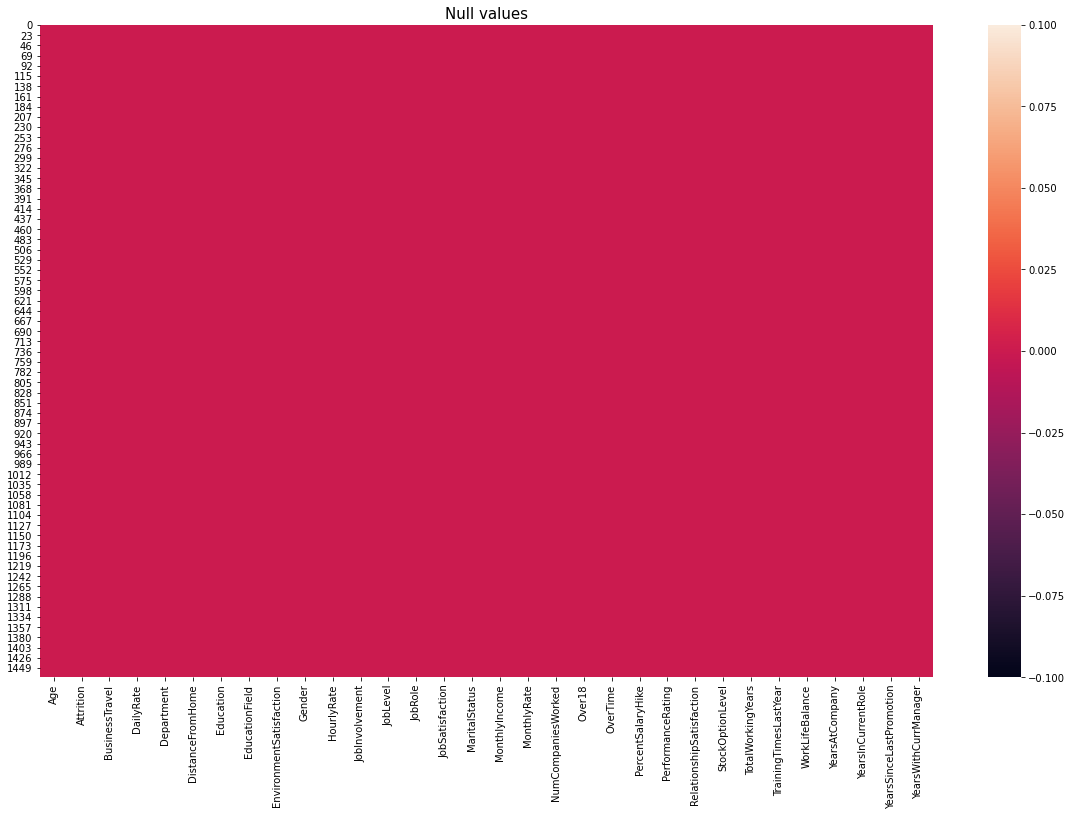

In [14]:
# ploting heatmap for double checking null values

plt.figure(figsize=(20,12))
plt.title("Null values",fontsize=15)
sns.heatmap(df.isnull());

## Statistical Summary:

In [15]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

#### We don't have any null values. 

## EDA

#### Lets try to analyze the target

In [16]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

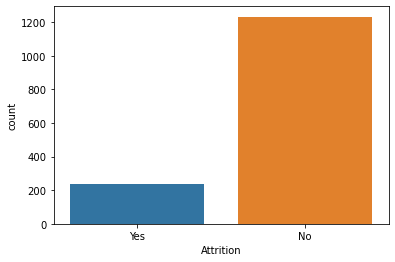

In [17]:
sns.countplot(x='Attrition', data=df)

## Making DataFrame for the object dtype

In [18]:
df_object=df.select_dtypes(include='object')

In [19]:
df_object

Attrition     BusinessTravel              Department    EducationField  \
0          Yes      Travel_Rarely                   Sales     Life Sciences   
1           No  Travel_Frequently  Research & Development     Life Sciences   
2          Yes      Travel_Rarely  Research & Development             Other   
3           No  Travel_Frequently  Research & Development     Life Sciences   
4           No      Travel_Rarely  Research & Development           Medical   
5           No  Travel_Frequently  Research & Development     Life Sciences   
6           No      Travel_Rarely  Research & Development           Medical   
7           No      Travel_Rarely  Research & Development     Life Sciences   
8           No  Travel_Frequently  Research & Development     Life Sciences   
9           No      Travel_Rarely  Research & Development           Medical   
10          No      Travel_Rarely  Research & Development           Medical   
11          No      Travel_Rarely  Research & Development     Life Sciences   
12          No      Travel_Rarely  Research & Development     Life Sciences   
13          No      Travel_Rarely  Research & Development           Medical   
14         Yes      Travel_Rarely  Research & Development     Life Sciences   
15          No      Travel_Rarely  Research & Development     Life Sciences   
16          No      Travel_Rarely  Research & Development     Life Sciences   
17          No         Non-Travel  Research & Development           Medical   
18          No      Travel_Rarely                   Sales     Life Sciences   
19          No      Travel_Rarely  Research & Development     Life Sciences   
20          No         Non-Travel  Research & Development             Other   
21         Yes      Travel_Rarely                   Sales     Life Sciences   
22          No      Travel_Rarely  Research & Development     Life Sciences   
23          No      Travel_Rarely  Research & Development     Life Sciences   
24         Yes      Travel_Rarely  Research & Development           Medical   
25          No      Travel_Rarely  Research & Development             Other   
26         Yes  Travel_Frequently  Research & Development     Life Sciences   
27          No      Travel_Rarely                   Sales         Marketing   
28          No      Travel_Rarely  Research & Development           Medical   
29          No      Travel_Rarely                   Sales         Marketing   
30          No      Travel_Rarely  Research & Development           Medical   
31          No      Travel_Rarely  Research & Development             Other   
32          No      Travel_Rarely  Research & Development           Medical   
33         Yes      Travel_Rarely                   Sales  Technical Degree   
34         Yes      Travel_Rarely  Research & Development           Medical   
35          No      Travel_Rarely  Research & Development           Medical   
36         Yes      Travel_Rarely                   Sales         Marketing   
37          No      Travel_Rarely                   Sales         Marketing   
38          No      Travel_Rarely  Research & Development     Life Sciences   
39          No  Travel_Frequently                   Sales     Life Sciences   
40          No      Travel_Rarely  Research & Development             Other   
41          No      Travel_Rarely  Research & Development     Life Sciences   
42         Yes      Travel_Rarely  Research & Development     Life Sciences   
43          No  Travel_Frequently                   Sales     Life Sciences   
44          No  Travel_Frequently  Research & Development           Medical   
45         Yes      Travel_Rarely  Research & Development  Technical Degree   
46          No         Non-Travel                   Sales         Marketing   
47          No      Travel_Rarely  Research & Development     Life Sciences   
48          No  Travel_Frequently                   Sales         Marketing   
49          No      Travel_Rarely  Research & Developme

In [20]:
#From what we see, Over18 column has duplicates, lets check.
print(df['Over18'].unique())

['Y']


In [21]:
#Since over18 is generic for job, we dont need this to predict Attrition. Hence i drop Over18 column
df = df.drop(['Over18'],axis=1)
df_object = df_object.drop(['Over18'],axis=1)

In [22]:
df.shape

(1470, 31)

In [23]:
df_object.shape

(1470, 8)

In [24]:
# Checking values counts for each categorical columns
for col in df_object:
    print('\n')
    print('*************',col,'*************')
    print(df[col].value_counts())



************* Attrition *************
No     1233
Yes     237
Name: Attrition, dtype: int64


************* BusinessTravel *************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


************* Department *************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


************* EducationField *************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


************* Gender *************
Male      882
Female    588
Name: Gender, dtype: int64


************* JobRole *************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
R

## Data Visualization

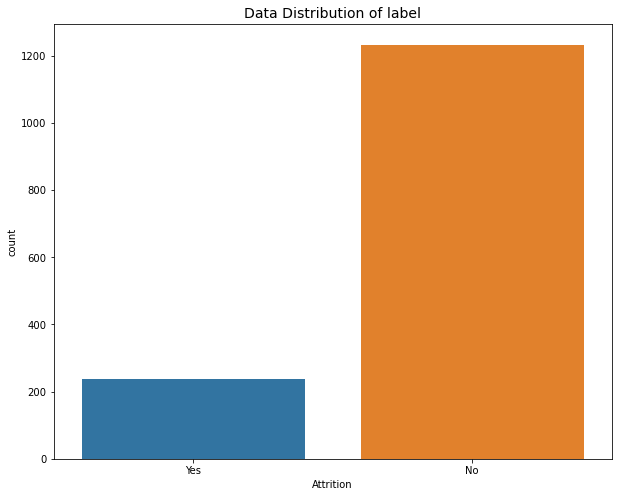

In [26]:
plt.figure(figsize=(10,8))
plt.title('Data Distribution of label',fontsize=14)
sns.countplot(df['Attrition'],data=df);

##### Observation : Clearly indicates class imbalance since the ratio is 6:1

## Data Destribution:

In [30]:
df_int=df.select_dtypes(include='int64')

In [31]:
df_int.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

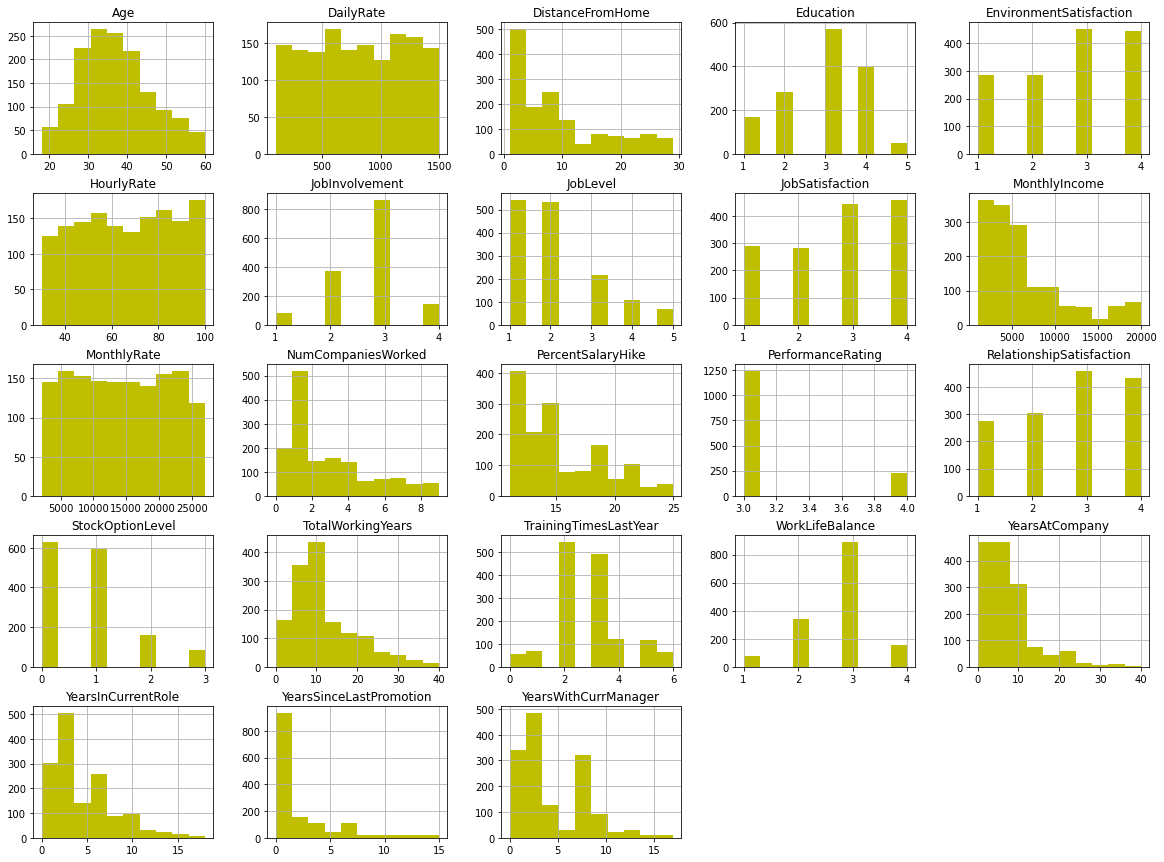

In [32]:
df_int.hist(color = 'y' , figsize=(20,15))

## Encode the DataFrame

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [34]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [35]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
5      32        0.0             1.0       1005         1.0                 2   
6      59        0.0             2.0       1324         1.0                 3   
7      30        0.0             2.0       1358         1.0                24   
8      38        0.0             1.0        216         1.0                23   
9      36        0.0             2.0       1299         1.0                27   
10     35        0.0             2.0        809         1.0                16   
11     29        0.0             2.0        153         1.0                15   
12     31        0.0             2.0        670         1.0                26   
13     34        0.0             2.0       1346         1.0                19   
14     28        1.0             2.0        103         1.0                24   
15     29        0.0             2.0       1389         1.0                21   
16     32        0.0             2.0        334         1.0                 5   
17     22        0.0             0.0       1123         1.0                16   
18     53        0.0             2.0       1219         2.0                 2   
19     38        0.0             2.0        371         1.0                 2   
20     24        0.0             0.0        673         1.0                11   
21     36        1.0             2.0       1218         2.0                 9   
22     34        0.0             2.0        419         1.0                 7   
23     21        0.0             2.0        391         1.0                15   
24     34        1.0             2.0        699         1.0                 6   
25     53        0.0             2.0       1282         1.0                 5   
26     32        1.0             1.0       1125         1.0                16   
27     42        0.0             2.0        691         2.0                 8   
28     44        0.0             2.0        477         1.0                 7   
29     46        0.0             2.0        705         2.0                 2   
30     33        0.0             2.0        924         1.0                 2   
31     44        0.0             2.0       1459         1.0                10   
32     30        0.0             2.0        125         1.0                 9   
33     39        1.0             2.0        895         2.0                 5   
34     24        1.0             2.0        813         1.0                 1   
35     43        0.0             2.0       1273         1.0                 2   
36     50        1.0             2.0        869         2.0                 3   
37     35        0.0             2.0        890         2.0                 2   
38     36        0.0             2.0        852         1.0                 5   
39     33        0.0             1.0       1141         2.0                 1   
40     35        0.0             2.0        464         1.0                 4   
41     27        0.0             2.0       1240         1.0                 2   
42     26        1.0             2.0       1357         1.0                25   
43     27        0.0             1.0        994         2.0                 8   
44     30        0.0             1.0        721         1.0                 1   
45     41        1.0             2.0       1360         1.0                12   
46     34        0.0             0.0       1065         2.0                23   
47     37        0.0             2.0        408         1.0                19   
48     46        0.0             1.0 

In [36]:
df.describe() 

Age    Attrition  BusinessTravel    DailyRate   Department  \
count  1470.000000  1470.000000     1470.000000  1470.000000  1470.000000   
mean     36.923810     0.161224        1.607483   802.485714     1.260544   
std       9.135373     0.367863        0.665455   403.509100     0.527792   
min      18.000000     0.000000        0.000000   102.000000     0.000000   
25%      30.000000     0.000000        1.000000   465.000000     1.000000   
50%      36.000000     0.000000        2.000000   802.000000     1.000000   
75%      43.000000     0.000000        2.000000  1157.000000     2.000000   
max      60.000000     1.000000        2.000000  1499.000000     2.000000   

       DistanceFromHome    Education  EducationField  EnvironmentSatisfaction  \
count       1470.000000  1470.000000     1470.000000              1470.000000   
mean           9.192517     2.912925        2.247619                 2.721769   
std            8.106864     1.024165        1.331369                 1.093082   
min            1.000000     1.000000        0.000000                 1.000000   
25%            2.000000     2.000000        1.000000                 2.000000   
50%            7.000000     3.000000        2.000000                 3.000000   
75%           14.000000     4.000000        3.000000                 4.000000   
max           29.000000     5.000000        5.000000                 4.000000   

            Gender  ...  PerformanceRating  RelationshipSatisfaction  \
count  1470.000000  ...        1470.000000               1470.000000   
mean      0.600000  ...           3.153741                  2.712245   
std       0.490065  ...           0.360824                  1.081209   
min       0.000000  ...           3.000000                  1.000000   
25%       0.000000  ...           3.000000                  2.000000   
50%       1.000000  ...           3.000000                  3.000000   
75%       1.000000  ...           3.000000                  4.000000   
max       1.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 31 columns]

## Correlation:

In [37]:
df.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

<AxesSubplot:>

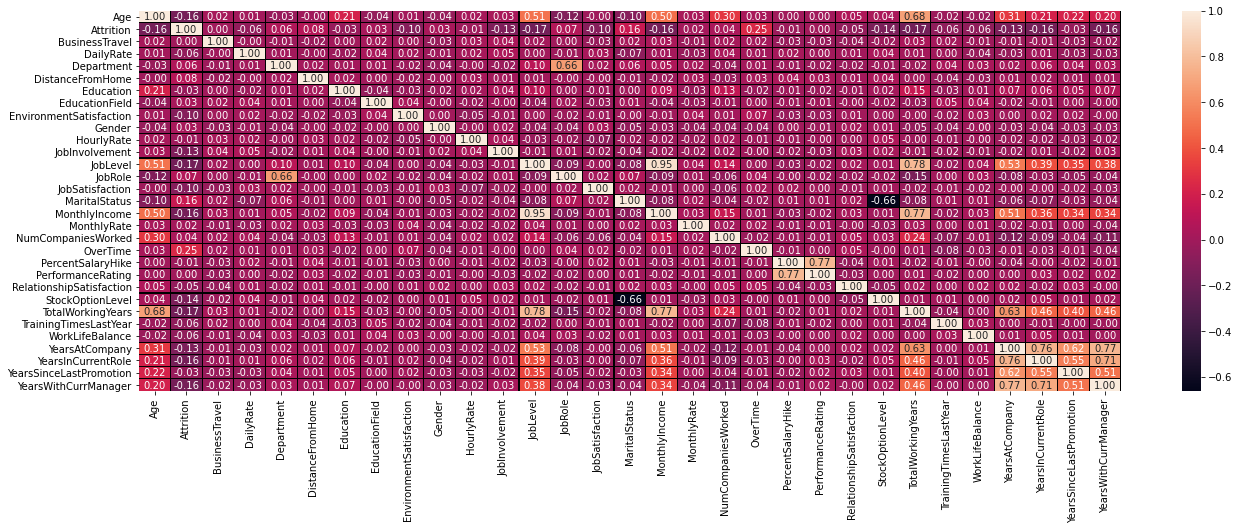

In [38]:
#Heatmap using df.corr

plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor='black',fmt="0.2f")

<AxesSubplot:>

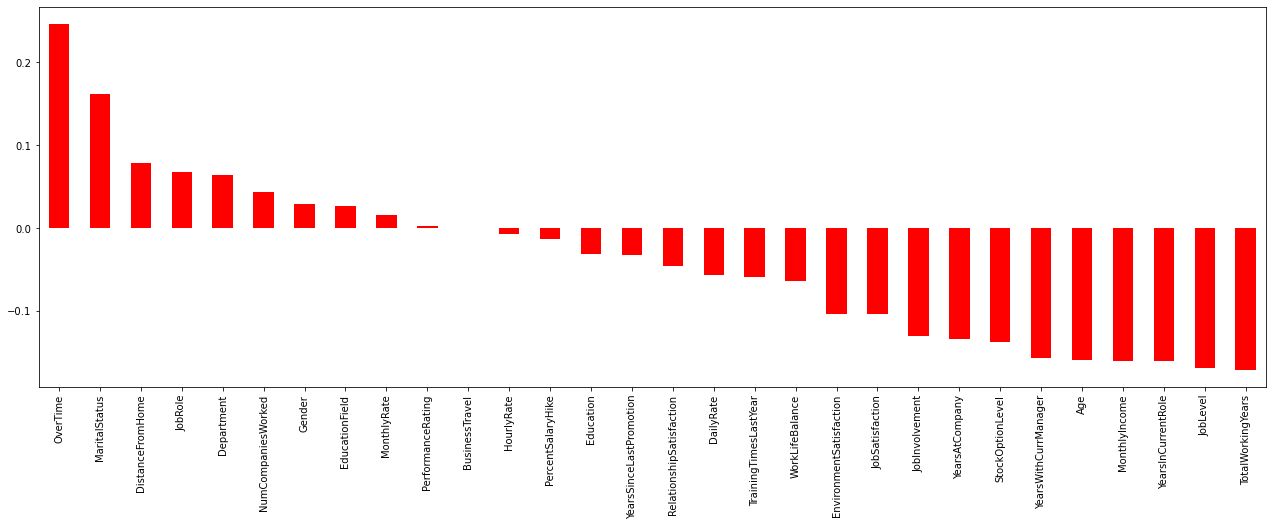

In [39]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='r')

#### OverTime , MaritalStatus, DistanceFromHome these are important features which are positivly correlated to our Target Attribute Wins.

MonthlyIncome, YearsAtCompany, TotalWorkingYears these are the features which are highly negatively correlated to our target attribute.

Feature like HourlyRate,BusinessTravel has correlation value near to zero which means almost no significance for target attribute prediction.

## Skewness

In [40]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

#### Most of the data is skewed

## checking for class imbalance

In [41]:
for i in df_int:
    if df[i].skew()>.55:
        df[i]=np.log1p(df[i])

In [42]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
Y

#### Skewness is handled

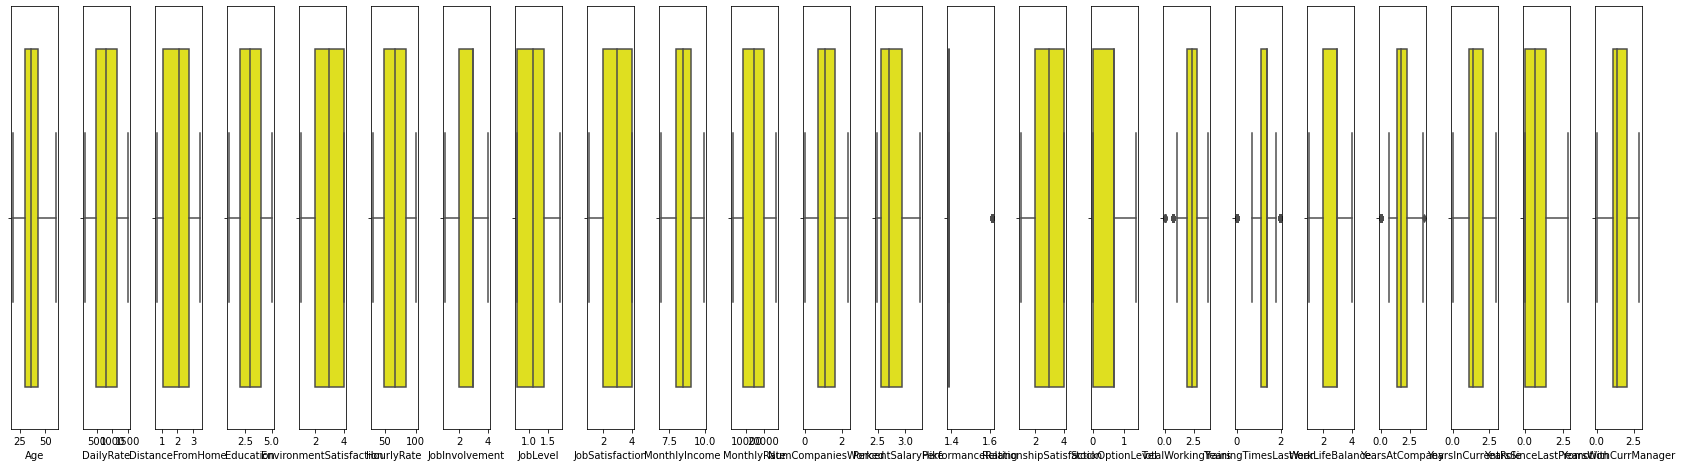

In [43]:
collist = df_int.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color ='yellow' , orient = 'v')
    plt.tight_layout()

## Outliers Removal

## ZScore Technique:

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_int))
z.shape

(1470, 23)

In [45]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([22, 21, 19, 21, 20, 21, 16, 16, 19, 21, 20, 21, 22, 16, 19, 21, 22,
       21, 16, 22, 19, 20, 21, 20, 22, 19, 21, 16, 19, 20, 21, 21, 22, 16,
       19, 19, 21, 21, 16, 20, 19, 19, 21, 19, 22, 21, 19, 16, 19, 21, 22,
       16, 22, 19, 21, 

In [46]:
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(1387, 31)


In [47]:
## Percentage data loss: 
loss_percent=(1470-1387)/1470*100
print(loss_percent)

5.646258503401361


#### Data loss is in the acceptable range , good to proceed.

## checking for class imbalance

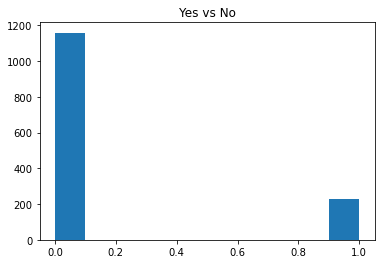

In [48]:
#Lets check if there is class imbalance

df["Attrition"].hist(grid = False)
plt.title("Yes vs No")
plt.show()

## Lets divide data into features and label after encoding

In [49]:
x = df.drop(['Attrition'],axis=1)
y = df['Attrition']

In [50]:
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41             2.0       1102         2.0          0.693147          2   
1   49             1.0        279         1.0          2.197225          1   
2   37             2.0       1373         1.0          1.098612          2   
3   33             1.0       1392         1.0          1.386294          4   
4   27             2.0        591         1.0          1.098612          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0             1.0                        2     0.0          94  ...   
1             1.0                        3     1.0          61  ...   
2             4.0                        4     1.0          92  ...   
3             1.0                        4     0.0          56  ...   
4             3.0                        1     1.0          40  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0           1.386294                         1          0.000000   
1           1.609438                         4          0.693147   
2           1.386294                         2          0.000000   
3           1.386294                         3          0.000000   
4           1.386294                         4          0.693147   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           2.197225               0.000000                1        1.945910   
1           2.397895               1.386294                3        2.397895   
2           2.079442               1.386294                3        0.000000   
3           2.197225               1.386294                3        2.197225   
4           1.945910               1.386294                3        1.098612   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            1.609438                 0.000000              1.791759  
1            2.079442                 0.693147              2.079442  
2            0.000000                 0.000000              0.000000  
3            2.079442                 1.386294              0.000000  
4            1.098612                 1.098612              1.098612  

[5 rows x 30 columns]

In [51]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float64

## feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)
x = pd.DataFrame(x_scaled, columns= x.columns)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.536681        0.593126   0.734325    1.405373         -1.502086   
1  1.442111       -0.905354  -1.307769   -0.496337          0.253886   
2  0.083966        0.593126   1.406752   -0.496337         -1.028716   
3 -0.368749       -0.905354   1.453896   -0.496337         -0.692855   
4 -1.047821        0.593126  -0.533609   -0.496337         -1.028716   

   Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  \
0  -0.876177       -0.940815                -0.665328 -1.229911    1.388670   
1  -1.853858       -0.940815                 0.251978  0.813067   -0.239091   
2  -0.876177        1.305159                 1.169285  0.813067    1.290017   
3   1.079185       -0.940815                 1.169285 -1.229911   -0.485721   
4  -1.853858        0.556501                -1.582635  0.813067   -1.274939   

   ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  ...          -0.424765                 -1.575817         -1.052154   
1  ...           2.354241                  1.199034          0.468783   
2  ...          -0.424765                 -0.650866         -1.052154   
3  ...          -0.424765                  0.274084         -1.052154   
4  ...          -0.424765                  1.199034          0.468783   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.052493              -3.388651        -2.501172        0.297751   
1           0.247982               0.302431         0.336558        0.939176   
2          -0.228855               0.302431         0.336558       -2.463747   
3          -0.052493               0.302431         0.336558        0.654398   
4          -0.428798               0.302431         0.336558       -0.904674   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.372567                -0.964086              0.628647  
1            0.980909                -0.028096              0.993844  
2           -1.710586                -0.964086             -1.645896  
3            0.980909                 0.907895             -1.645896  
4           -0.288613                 0.519424             -0.251267  

[5 rows x 30 columns]

## Feature importance

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [54]:
print(extra.feature_importances_)

[0.03876507 0.02415317 0.03206165 0.02446774 0.03469493 0.02936064
 0.03038011 0.04006094 0.02209468 0.03098323 0.03302611 0.03397467
 0.03321065 0.03640959 0.03219374 0.03876126 0.03007044 0.03098438
 0.07123613 0.02994129 0.01407353 0.03450739 0.03541937 0.04298671
 0.0301682  0.03551925 0.03417976 0.03204387 0.02908337 0.03518812]


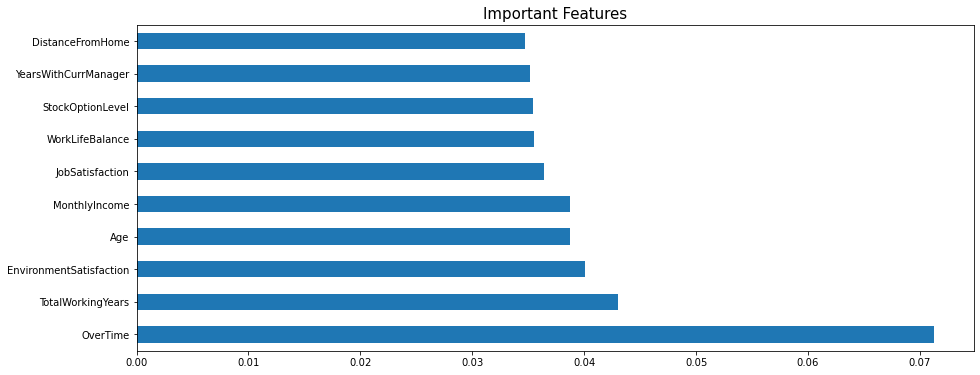

In [55]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

#### OverTime Total working Years and MonthlyIncome are 3 major attributed which decide whether employee will leave or Not.

## PCA

In [56]:
from sklearn import decomposition
from sklearn.decomposition import PCA
covar_matrix=PCA(n_components=30)

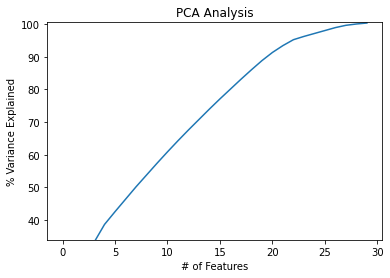

In [57]:
#Calculate Eigenvalues
covar_matrix.fit(x)  ## x should be scaled
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative  explained with n features
## draw graph
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(34,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

## Finding Best Random_state:

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score,f1_score

In [59]:
lr = LogisticRegression()

In [60]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print(f"At random state {i}, The model performs very well")
        
        print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)*100}")
        print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)*100}")
        print("\n")

At random state 32, The model performs very well
At random state 32, the training accuracy is:- 88.09738503155997
At random state 32, the testing accuracy is:- 88.12949640287769


At random state 90, The model performs very well
At random state 90, the training accuracy is:- 88.09738503155997
At random state 90, the testing accuracy is:- 88.12949640287769


At random state 159, The model performs very well
At random state 159, the training accuracy is:- 88.09738503155997
At random state 159, the testing accuracy is:- 88.12949640287769


At random state 165, The model performs very well
At random state 165, the training accuracy is:- 88.5482416591524
At random state 165, the testing accuracy is:- 88.48920863309353


At random state 181, The model performs very well
At random state 181, the training accuracy is:- 87.37601442741209
At random state 181, the testing accuracy is:- 87.41007194244604


At random state 231, The model performs very well
At random state 231, the training accuracy

##### Best training accuracy is 88.81%, best testing accuracy is 88.84% on Random_state 589.

## Creating Train-Test-split SMOTE()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 589)

In [62]:
x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling using SMOTE for dealing the CLASS IMBALANCE.

In [63]:
print('Training Attrition - \n', y_train.value_counts())

Training Attrition - 
 0.0    924
1.0    924
Name: Attrition, dtype: int64


## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('F1 score',f1_score(y_test,predlr)*100)
print('Roc_auc Score',roc_auc_score(y_test,predlr)*100)

Accuracy 77.33812949640287
[[181  53]
 [ 10  34]]
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       234
         1.0       0.39      0.77      0.52        44

    accuracy                           0.77       278
   macro avg       0.67      0.77      0.69       278
weighted avg       0.86      0.77      0.80       278

F1 score 51.908396946564885
Roc_auc Score 77.31157731157732


## Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))
print('F1 score',f1_score(y_test,preddt)*100)
print('Roc_auc Score',roc_auc_score(y_test,preddt)*100)

Accuracy 76.61870503597122
[[196  38]
 [ 27  17]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       234
         1.0       0.31      0.39      0.34        44

    accuracy                           0.77       278
   macro avg       0.59      0.61      0.60       278
weighted avg       0.79      0.77      0.78       278

F1 score 34.34343434343434
Roc_auc Score 61.19852369852369


## Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))
print('F1 score',f1_score(y_test,preddt)*100)
print('Roc_auc Score',roc_auc_score(y_test,preddt)*100)

Accuracy 76.61870503597122
[[196  38]
 [ 27  17]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       234
         1.0       0.31      0.39      0.34        44

    accuracy                           0.77       278
   macro avg       0.59      0.61      0.60       278
weighted avg       0.79      0.77      0.78       278

F1 score 34.34343434343434
Roc_auc Score 61.19852369852369


## SVM

In [67]:
from sklearn.svm import SVC

svc = SVC()
svc.fit( x_train, y_train)

ad_pred = svc.predict(x_test)
print("Acuuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))
print('F1 score',f1_score(y_test,preddt)*100)
print('Roc_auc Score',roc_auc_score(y_test,preddt)*100)

Acuuracy 83.45323741007195
[[214  20]
 [ 26  18]]
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       234
         1.0       0.47      0.41      0.44        44

    accuracy                           0.83       278
   macro avg       0.68      0.66      0.67       278
weighted avg       0.83      0.83      0.83       278

F1 score 34.34343434343434
Roc_auc Score 61.19852369852369


### Lets check the CV scores for the above models, for overfitting.

## Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of LR model:", scr.mean())

Cross Validation score of LR model: 0.8767161000441523


In [69]:
scr=cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DT model:", scr.mean())

Cross Validation score of DT model: 0.7721424304599642


In [70]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of rf model:", scr.mean())

Cross Validation score of rf model: 0.8558060410877075


In [71]:
scr=cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model:", scr.mean())

Cross Validation score of SVC model: 0.8666233799963639


### Considering good CV score, Logistic Regression is performing better among all,  also additionally F1_score is also good and  its Roc_auc score is high

## Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

## Creating parameter list to pass in GridsearchCV
parameters = { "multi_class":['auto', 'ovr', 'multinomial'], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              "penalty" :['l1', 'l2', 'elasticnet', 'none']}

In [73]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_  # Printing the best parameter found by GridSearchCV

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [74]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Prediciting with the best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

0.7733812949640287

## Accuracy of LogisticRegression after Hyper parameter tuning is 77%.¶

## ROC AUC Plot

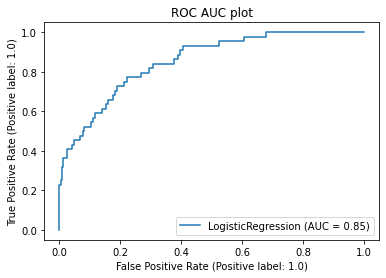

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

### Logistic Regression AUC score is 85%. which is good.

## Comparing y_pred with y_test to check the model performance

In [76]:
pred_lr = lr.predict(x_test)         #We make prediction for the x_test data, and compare the obtained pred_values 
                                            #with the actual y_test values to check our model performance
pred_lr 

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0.

In [77]:
y_test

1059    0.0
719     0.0
1142    0.0
882     0.0
501     0.0
667     1.0
51      1.0
626     0.0
390     0.0
342     0.0
125     0.0
484     0.0
710     0.0
387     0.0
796     1.0
1134    0.0
768     0.0
1106    1.0
902     0.0
210     1.0
1262    1.0
193     0.0
676     0.0
159     0.0
929     0.0
492     0.0
1288    0.0
341     0.0
757     0.0
257     0.0
152     0.0
184     0.0
1049    0.0
311     0.0
1015    0.0
1097    0.0
537     0.0
52      0.0
507     0.0
1198    0.0
890     0.0
860     1.0
66      0.0
972     0.0
29      0.0
283     0.0
482     1.0
335     0.0
991     0.0
974     0.0
1126    0.0
708     0.0
1276    0.0
1368    0.0
263     0.0
665     0.0
1292    0.0
472     0.0
101     0.0
456     0.0
1007    1.0
531     0.0
249     0.0
977     0.0
1227    0.0
240     0.0
559     0.0
74      0.0
8       0.0
1061    0.0
435     1.0
662     1.0
1252    0.0
927     0.0
1254    0.0
1020    0.0
261     0.0
1283    0.0
217     1.0
940     1.0
1309    0.0
844     0.0
1314    0.0
712 

## Saving the model in Pickle format

In [78]:
import pickle
filename = "HR_Analytics.pkl"
pickle.dump(lr,open(filename, "wb"))

## Conclusion:

In [79]:
import numpy as np
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
df_com = pd.DataFrame({"Original": a, "Predicted":predicted}, index= range(len(a)))
df_com

Original  Predicted
0         0.0        0.0
1         0.0        0.0
2         0.0        1.0
3         0.0        0.0
4         0.0        0.0
5         1.0        1.0
6         1.0        1.0
7         0.0        0.0
8         0.0        0.0
9         0.0        0.0
10        0.0        0.0
11        0.0        0.0
12        0.0        0.0
13        0.0        0.0
14        1.0        0.0
15        0.0        0.0
16        0.0        0.0
17        1.0        0.0
18        0.0        0.0
19        1.0        0.0
20        1.0        1.0
21        0.0        0.0
22        0.0        0.0
23        0.0        0.0
24        0.0        0.0
25        0.0        0.0
26        0.0        0.0
27        0.0        0.0
28        0.0        0.0
29        0.0        0.0
30        0.0        0.0
31        0.0        0.0
32        0.0        0.0
33        0.0        0.0
34        0.0        0.0
35        0.0        0.0
36        0.0        0.0
37        0.0        0.0
38        0.0        0.0
39        0.0        0.0
40        0.0        0.0
41        1.0        0.0
42        0.0        0.0
43        0.0        0.0
44        0.0        0.0
45        0.0        0.0
46        1.0        0.0
47        0.0        0.0
48        0.0        0.0
49        0.0        0.0
50        0.0        0.0
51        0.0        0.0
52        0.0        0.0
53        0.0        0.0
54        0.0        0.0
55        0.0        0.0
56        0.0        0.0
57        0.0        0.0
58        0.0        0.0
59        0.0        0.0
60        1.0        0.0
61        0.0        0.0
62        0.0        0.0
63        0.0        0.0
64        0.0        0.0
65        0.0        0.0
66        0.0        1.0
67        0.0        0.0
68        0.0        0.0
69        0.0        0.0
70        1.0        0.0
71        1.0        0.0
72        0.0        0.0
73        0.0        0.0
74        0.0        0.0
75        0.0        0.0
76        0.0        0.0
77        0.0        0.0
78        1.0        0.0
79        1.0        0.0
80        0.0        0.0
81        0.0        0.0
82        0.0        0.0
83        0.0        0.0
84        1.0        0.0
85        1.0        1.0
86        0.0        0.0
87        0.0        0.0
88        0.0        0.0
89        0.0        0.0
90        0.0        0.0
91        0.0        0.0
92        0.0        0.0
93        1.0        1.0
94        0.0        0.0
95        0.0        0.0
96        0.0        0.0
97        0.0        0.0
98        0.0        0.0
99        0.0        0.0
100       0.0        0.0
101       0.0        0.0
102       0.0        0.0
103       1.0        0.0
104       0.0        0.0
105       0.0        0.0
106       0.0        0.0
107       0.0        0.0
108       0.0        0.0
109       0.0        0.0
110       0.0        0.0
111       0.0        0.0
112       1.0        1.0
113       1.0        1.0
114       0.0        0.0
115       0.0        0.0
116       0.0        0.0
117       0.0        0.0
118       1.0        1.0
119       0.0        0.0
120       0.0        0.0
121       0.0        0.0
122       0.0        0.0
123       0.0        0.0
124       0.0        0.0
125       0.0        0.0
126       0.0        0.0
127       0.0        1.0
128       1.0        1.0
129       0.0        0.0
130       0.0        0.0
131       0.0        0.0
132       0.0        0.0
133       1.0        1.0
134       0.0        0.0
135       0.0        1.0
136       0.0        0.0
137       0.0        0.0
138       0.0        0.0
139       0.0        0.0
140       1.0        1.0
141       0.0        0.0
142       0.0        0.0
143       0.0        0.0
144       1.0        0.0
145       0.0        0.0
146       0.0        0.0
147       0.0        0.0
148       0.0        0.0
149       1.0        0.0
150       0.0        0.0
151       0.0        0.0
152       0.0        0.0
153       0.0        0.0
154       0.0        0.0
155       0.0        0.0
156       0.0        0.0
157       0.0        0.0
158       1.0        1.0
159  

#### We Can visualize that our model is good in predicting the Attrition.